In [10]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.special import softmax
from sklearn.metrics import roc_auc_score

,labels,dim1,dim2,softmax1,softmax2
ID,,,,,
10171,0,-0.557331,-1.483709,0.716340,0.283660
10193,0,-0.535498,-1.507707,0.725560,0.274440
10206,0,-0.580274,-1.325678,0.678176,0.321824
10227,0,-0.513846,-1.401875,0.708483,0.291517
10228,0,-0.526436,-1.353741,0.695785,0.304215
...,...,...,...,...,...
ja110213,0,-0.557715,-1.496967,0.718949,0.281051
kk100232,0,-0.516915,-1.384777,0.704301,0.295699
ks100063,0,-0.516118,-1.447538,0.717363,0.282637


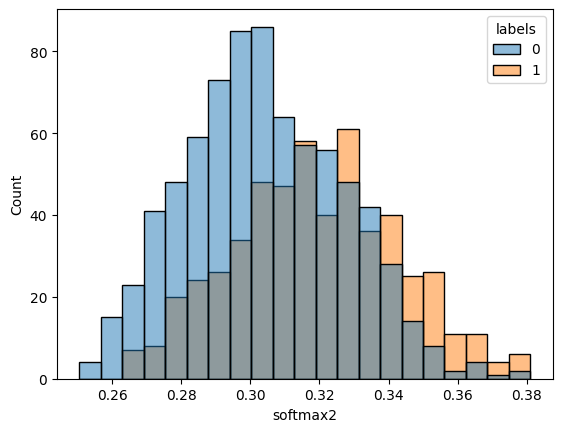

In [16]:
model_path = '/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step3/occipital/supervised_structure/convnet/17-16-45_131'
outputs = pd.read_csv(model_path+ '/schiz_diag_supervised_results/best_model_outputs/full_outputs.csv', index_col=0)
outputs[['softmax1', 'softmax2']] = softmax(outputs[['dim1', 'dim2']], axis=1)

sns.histplot(outputs, x='softmax2', hue='labels')

outputs

# Ensemble model on occipital (seconde wave)

In [19]:
models_path = "/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step3/occipital/supervised_structure/convnet"

full_outputs = pd.DataFrame()
train_outputs = pd.DataFrame()
val_outputs = pd.DataFrame()
test_intra_outputs = pd.DataFrame()
test_outputs = pd.DataFrame()

res_dfs = {'full': full_outputs,
           'train': train_outputs,
           'val': val_outputs,
           'test_intra': test_intra_outputs,
           'test': test_outputs}


models = [model for model in os.listdir(models_path) if not os.path.isfile(os.path.join(models_path, model))]
count = 0

for model in models:
    count += 1
    print(count, model)
    outputs_path = os.path.join(models_path, model, "schiz_diag_supervised_results/best_model_outputs")
    for subset, res_df in res_dfs.items():
        models_outputs = pd.read_csv(os.path.join(outputs_path, f'{subset}_outputs.csv'), index_col=0)
        models_outputs[['softmax1', 'softmax2']] = softmax(models_outputs[['dim1', 'dim2']], axis=1)
        if 'labels' not in res_df.columns:
            res_df = models_outputs.copy().drop(['dim1', 'dim2'], axis=1)
        else:
            res_df = pd.concat([res_df, models_outputs[['softmax1', 'softmax2']]], axis=1)
        res_dfs[subset] = res_df

full_df = res_dfs['full']
test_df = res_dfs['test']
full_df

1 15-57-42_219
2 01-56-29_254
3 18-04-16_194
4 00-16-43_103
5 23-06-16_146
6 21-05-06_145
7 20-38-28_247
8 15-54-47_22
9 20-47-48_181
10 19-42-09_133
11 20-50-20_82
12 20-30-58_153
13 19-53-42_210
14 21-55-25_217
15 22-06-42_35
16 00-25-21_16
17 23-55-20_214
18 16-23-17_194
19 21-30-20_89
20 17-16-14_114
21 15-54-46_61
22 19-30-45_224
23 18-29-46_107
24 16-39-33_197
25 22-14-11_93
26 18-47-33_93
27 23-48-36_63
28 00-42-46_100
29 20-18-06_26
30 16-21-30_143
31 01-55-52_90
32 21-37-18_5
33 02-05-24_253
34 19-35-02_21
35 16-08-20_232
36 15-56-59_205
37 18-12-34_169
38 19-45-17_188
39 17-05-14_131
40 20-00-18_16
41 16-24-57_138
42 18-40-03_178
43 03-29-18_144
44 18-55-26_17
45 21-40-19_42
46 18-20-02_199
47 18-49-49_6
48 18-34-34_205
49 23-53-27_188
50 19-25-34_183
51 19-51-44_105
52 20-14-30_188
53 21-19-48_44
54 22-02-12_133
55 17-47-10_9
56 17-32-34_144
57 19-20-40_122
58 23-19-01_42
59 21-16-00_15
60 21-26-55_254
61 16-41-11_66
62 00-22-01_101
63 21-41-12_37
64 22-50-28_20
65 16-48-37_

,labels,softmax1,softmax2,softmax1,softmax2,softmax1,softmax2,softmax1,softmax2,softmax1,...,softmax1,softmax2,softmax1,softmax2,softmax1,softmax2,softmax1,softmax2,softmax1,softmax2
ID,,,,,,,,,,,,,,,,,,,,,
10171,0,0.998155,0.001845,0.634898,0.365102,0.647756,0.352244,0.685583,0.314417,0.630214,...,0.606724,0.393276,0.556624,0.443376,0.706649,0.293351,0.608310,0.391690,0.603462,0.396538
10193,0,0.998361,0.001639,0.634898,0.365102,0.631625,0.368375,0.687732,0.312268,0.630214,...,0.606724,0.393276,0.650518,0.349482,0.770330,0.229670,0.609882,0.390118,0.614592,0.385408
10206,0,0.997565,0.002435,0.634898,0.365102,0.593432,0.406568,0.660888,0.339112,0.630214,...,0.606724,0.393276,0.534951,0.465049,0.665913,0.334087,0.602819,0.397181,0.585486,0.414514
10227,0,0.997802,0.002198,0.634898,0.365102,0.636565,0.363435,0.674265,0.325735,0.630214,...,0.606724,0.393276,0.578268,0.421732,0.728685,0.271315,0.611200,0.388800,0.602991,0.397009
10228,0,0.997704,0.002296,0.634898,0.365102,0.617819,0.382181,0.669128,0.330872,0.630214,...,0.606724,0.393276,0.619095,0.380905,0.697699,0.302301,0.604968,0.395032,0.587176,0.412824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ja110213,0,0.998089,0.001911,0.634898,0.365102,0.631219,0.368781,0.682281,0.317719,0.630214,...,0.606724,0.393276,0.720099,0.279901,0.756331,0.243669,0.613986,0.386014,0.608600,0.391400
kk100232,0,0.997779,0.002221,0.634898,0.365102,0.623882,0.376118,0.674508,0.325492,0.630214,...,0.606724,0.393276,0.583011,0.416989,0.677696,0.322304,0.611431,0.388569,0.593081,0.406919
ks100063,0,0.998221,0.001779,0.634898,0.365102,0.645889,0.354111,0.684408,0.315592,0.630214,...,0.606724,0.393276,0.689490,0.310510,0.741015,0.258985,0.611640,0.388360,0.608689,0.391311


In [20]:
meaned_agg_model = pd.DataFrame(index=test_df.index)
meaned_agg_model['labels'] = test_df.labels
meaned_agg_model['softmax1'] = test_df.softmax1.mean(axis=1)
meaned_agg_model['softmax2'] = test_df.softmax2.mean(axis=1)

print("Aggregated model (mean) AUC: ", roc_auc_score(meaned_agg_model.labels, meaned_agg_model.softmax2))

meaned_agg_model

Aggregated model (mean) AUC:  0.5619148293566898


,labels,softmax1,softmax2
ID,,,
A00000300,0,0.614289,0.385711
A00000368,1,0.620998,0.379002
A00000456,1,0.610575,0.389425
A00000838,1,0.610663,0.389337
A00000909,1,0.626158,0.373842
...,...,...,...
A00037649,1,0.605128,0.394872
A00037665,0,0.618320,0.381680
A00037854,1,0.602077,0.397923


In [21]:
median_agg_model = pd.DataFrame(index=test_df.index)
median_agg_model['labels'] = test_df.labels
median_agg_model['softmax1'] = test_df.softmax1.median(axis=1)
median_agg_model['softmax2'] = test_df.softmax2.median(axis=1)

print("Aggregated model (median) AUC: ", roc_auc_score(median_agg_model.labels, median_agg_model.softmax2))

median_agg_model

Aggregated model (median) AUC:  0.5659166414980368


,labels,softmax1,softmax2
ID,,,
A00000300,0,0.604680,0.395320
A00000368,1,0.606622,0.393378
A00000456,1,0.604119,0.395881
A00000838,1,0.603977,0.396023
A00000909,1,0.607920,0.392080
...,...,...,...
A00037649,1,0.602985,0.397015
A00037665,0,0.604416,0.395584
A00037854,1,0.603097,0.396903


# Same thing on all regions

In [23]:
regions_path = "/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step2"

regions = [region for region in os.listdir(regions_path) if not os.path.isfile(os.path.join(regions_path, region))]

for region in regions:
    print(region)

    full_outputs = pd.DataFrame()
    train_outputs = pd.DataFrame()
    val_outputs = pd.DataFrame()
    test_intra_outputs = pd.DataFrame()
    test_outputs = pd.DataFrame()

    res_dfs = {'full': full_outputs,
            'train': train_outputs,
            'val': val_outputs,
            'test_intra': test_intra_outputs,
            'test': test_outputs}
    
    count = 0  # count models

    for sub_folder in ['both', 'both2']:
        models_path = os.path.join(regions_path, region, sub_folder)
        models = [model for model in os.listdir(models_path) if not os.path.isfile(os.path.join(models_path, model))]
        
        for model in models:
            count += 1
            print(count, model)
            outputs_path = os.path.join(models_path, model, "schiz_diag_supervised_results/best_model_outputs")
            for subset, res_df in res_dfs.items():
                models_outputs = pd.read_csv(os.path.join(outputs_path, f'{subset}_outputs.csv'), index_col=0)
                models_outputs[['softmax1', 'softmax2']] = softmax(models_outputs[['dim1', 'dim2']], axis=1)
                if 'labels' not in res_df.columns:
                    res_df = models_outputs.copy().drop(['dim1', 'dim2'], axis=1)
                else:
                    res_df = pd.concat([res_df, models_outputs[['softmax1', 'softmax2']]], axis=1)
                res_dfs[subset] = res_df

    # create the save path if needed
    save_path = os.path.join(regions_path, region, 'ensemble_models')
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    if os.path.exists(os.path.join(regions_path, region, 'aggregated_models')):
        shutil.rmtree(os.path.join(regions_path, region, 'aggregated_models'))

    # compute the aggregated models (mean and median)
    for subset, res_df in res_dfs.items():
        meaned_agg_model = pd.DataFrame(index=res_df.index)
        meaned_agg_model['labels'] = res_df.labels
        meaned_agg_model['agg_mean1'] = res_df.softmax1.mean(axis=1)
        meaned_agg_model['agg_mean2'] = res_df.softmax2.mean(axis=1)

        median_agg_model = pd.DataFrame(index=res_df.index)
        median_agg_model['labels'] = res_df.labels
        median_agg_model['agg_median1'] = res_df.softmax1.median(axis=1)
        median_agg_model['agg_median2'] = res_df.softmax2.median(axis=1)

        meaned_agg_model.to_csv(os.path.join(save_path, f'{subset}_ensemble_mean_probas.csv'))
        median_agg_model.to_csv(os.path.join(save_path, f'{subset}_ensemble_median_probas.csv'))

cingulate
1 15-19-59_132
2 14-57-02_112
3 15-38-02_47
4 15-02-32_112
5 15-11-04_4
6 15-36-33_134
7 15-23-45_11
8 15-19-21_61
9 15-04-25_89
10 15-06-28_102
11 14-57-10_109
12 14-55-53_240
13 15-00-30_189
14 14-56-59_196
15 14-56-04_195
16 17-19-51_131
17 18-16-38_234
18 16-30-45_135
19 17-56-27_110
20 16-07-46_143
21 16-30-43_168
22 16-34-47_46
23 18-11-42_18
24 17-39-23_34
25 17-20-18_20
26 16-58-00_125
27 16-45-43_170
28 17-01-38_165
29 16-23-13_194
30 17-14-39_57
31 15-50-18_206
32 16-49-33_222
33 18-07-52_79
34 15-50-27_252
35 18-39-43_194
36 17-14-28_117
37 17-49-02_125
38 16-58-01_61
39 16-13-37_98
40 17-35-29_246
41 17-40-41_199
42 17-29-32_207
43 16-38-08_145
44 17-27-26_176
45 16-27-17_171
46 15-50-26_235
47 15-50-22_12
48 15-59-50_116
49 16-45-46_184
50 17-07-35_222
51 15-50-19_99
52 18-29-47_203
53 17-21-17_101
54 17-43-58_230
55 16-48-25_151
56 17-08-39_180
57 17-00-31_230
58 16-00-44_156
59 18-07-49_62
60 16-09-37_115
internal_parietal
1 22-24-02_1
2 21-45-07_76
3 21-17-21_

In [19]:
regions_path = "/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step2"
regions = [region for region in os.listdir(regions_path) if not os.path.isfile(os.path.join(regions_path, region))]
subsets = ['full', 'train', 'val', 'test_intra', 'test']

cols = [f"best_{subset}_mean_auc" for subset in subsets] + [f"best_{subset}_median_auc" for subset in subsets]

auc_df = pd.DataFrame(index=regions, columns=cols)


for region in regions:
    print(region)
    save_path = os.path.join(regions_path, region, 'ensemble_models')
    for subset in subsets:
        # load df
        mean_df = pd.read_csv(os.path.join(save_path, f'{subset}_ensemble_mean_probas.csv'))
        median_df = pd.read_csv(os.path.join(save_path, f'{subset}_ensemble_median_probas.csv'))

        # compute auc
        mean_auc = roc_auc_score(mean_df.labels, mean_df.agg_mean2)
        median_auc = roc_auc_score(median_df.labels, median_df.agg_median2)

        # store auc
        auc_df.loc[region, f'best_{subset}_mean_auc'] = mean_auc
        auc_df.loc[region, f'best_{subset}_median_auc'] = median_auc

auc_df = auc_df.sort_index(key=lambda col: col.str.lower())
auc_df.to_csv(regions_path+'/ensemble_models_by_region.csv')
auc_df

cingulate
internal_parietal
FCMpost
fronto-parietal_medial_face
SFinternal
SFmarginal
Sor
occipito_temporal
fissure_parieto_occipital
occipital
inferior_temporal
Sor_olfactif
precentral
FIP
postcentral
pericalcarine
STs_br
SFintermediate
STs
fissure_lateral
fissure_collateral
SC_sylv
SFmedian
BROCA
lobule_parietal_sup


,best_full_mean_auc,best_train_mean_auc,best_val_mean_auc,best_test_intra_mean_auc,best_test_mean_auc,best_full_median_auc,best_train_median_auc,best_val_median_auc,best_test_intra_median_auc,best_test_median_auc
BROCA,0.747727,0.833728,0.6,0.596675,0.528239,0.624303,0.666383,0.579626,0.540025,0.517366
cingulate,0.768114,0.834054,0.705198,0.608682,0.547267,0.71068,0.756615,0.693555,0.600985,0.552099
FCMpost,0.700304,0.759473,0.707692,0.565887,0.538357,0.643475,0.675131,0.711019,0.571121,0.541679
FIP,0.932536,1.0,0.703534,0.653017,0.547569,0.870788,0.976978,0.686902,0.685961,0.531108
fissure_collateral,0.74931,0.830163,0.760915,0.632697,0.572637,0.715723,0.7826,0.755094,0.654557,0.572335
fissure_lateral,0.832863,0.930934,0.656133,0.798337,0.551797,0.783877,0.867268,0.651559,0.785714,0.545002
fissure_parieto_occipital,0.8067,0.899861,0.715177,0.615148,0.559499,0.769485,0.850789,0.712682,0.629926,0.545908
fronto-parietal_medial_face,0.842016,0.915478,0.712266,0.746921,0.580338,0.817239,0.883567,0.711435,0.73399,0.578526
inferior_temporal,0.682761,0.723907,0.644906,0.711515,0.565992,0.642632,0.668829,0.659459,0.664717,0.557838
internal_parietal,0.811036,0.917819,0.71684,0.565579,0.48958,0.682388,0.733358,0.686071,0.6133,0.490335


# Compare to mean region perf

<Axes: xlabel='region', ylabel='best_test_auc'>

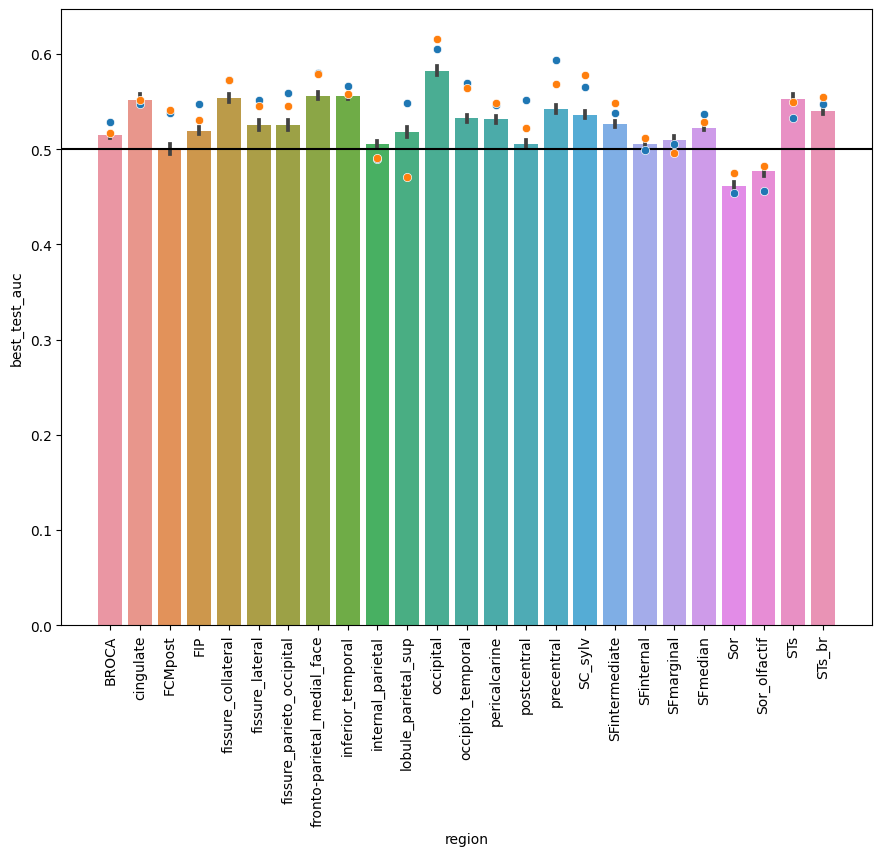

In [18]:
def get_model_region(model_path):
    region = model_path.split('/')[-3]
    return region

def preprocess_bdd(bdd):
    bdd['min_best_auc'] = bdd[['best_train_auc', 'best_val_auc', 'best_test_intra_auc', 'best_test_auc']].apply(min, axis=1)
    bdd['min_final_auc'] = bdd[['train_auc', 'val_auc', 'test_intra_auc', 'test_auc']].apply(min, axis=1)
    bdd['min_best_intra'] = bdd[['best_train_auc', 'best_val_auc', 'best_test_intra_auc']].apply(min, axis=1)

    # get the region short name
    bdd['region'] = bdd.model_path.map(get_model_region)



bdd = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/bdd_step2.csv", index_col=0)
preprocess_bdd(bdd)
bdd = bdd.sort_values(by='region', key=lambda col: col.str.lower())
bdd = bdd.dropna()


plt.figure(figsize=(23,8))

plt.subplot(1,2,1)
sns.barplot(bdd, x='region', y='best_test_auc', errorbar='se')
plt.xticks(rotation=90)
plt.axhline(0.5, c='black')
# add median
medians = []
for region in bdd.region.unique():
    # print(region) # check if regions are in the same order
    medians.append(bdd[bdd.region == region].best_test_auc.median())
sns.scatterplot(x=bdd.region.unique(), y=auc_df.best_test_mean_auc, zorder=25, markers='s')
sns.scatterplot(x=bdd.region.unique(), y=auc_df.best_test_median_auc, zorder=25)